In [15]:
!pip install scikit-learn
!pip install gapminder

In [170]:
import numpy as np
from gapminder import gapminder
from sklearn import linear_model
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [24]:
#1

# a

def function(x, y):
  xm= x.mean()
  ym= y.mean()

  xDilf= x-xm
  yDilf= y-ym

  B1= ( (xDilf*yDilf).sum() ) / ( (xDilf**2).sum() )
  B0= ym- B1*xm

  return B1, B0

# b
datos = gapminder [gapminder["country"]=="Argentina"]
print( function(datos["year"], datos["lifeExp"]))

modelo= linear_model.LinearRegression()
modelo.fit(datos[["year"]], datos[["lifeExp"]])
b1= modelo.coef_[0][0]
b0= modelo.intercept_[0]
print(b1,b0)



(0.2317083916083916, -389.6063445221445)
0.23170839160839155 -389.6063445221444


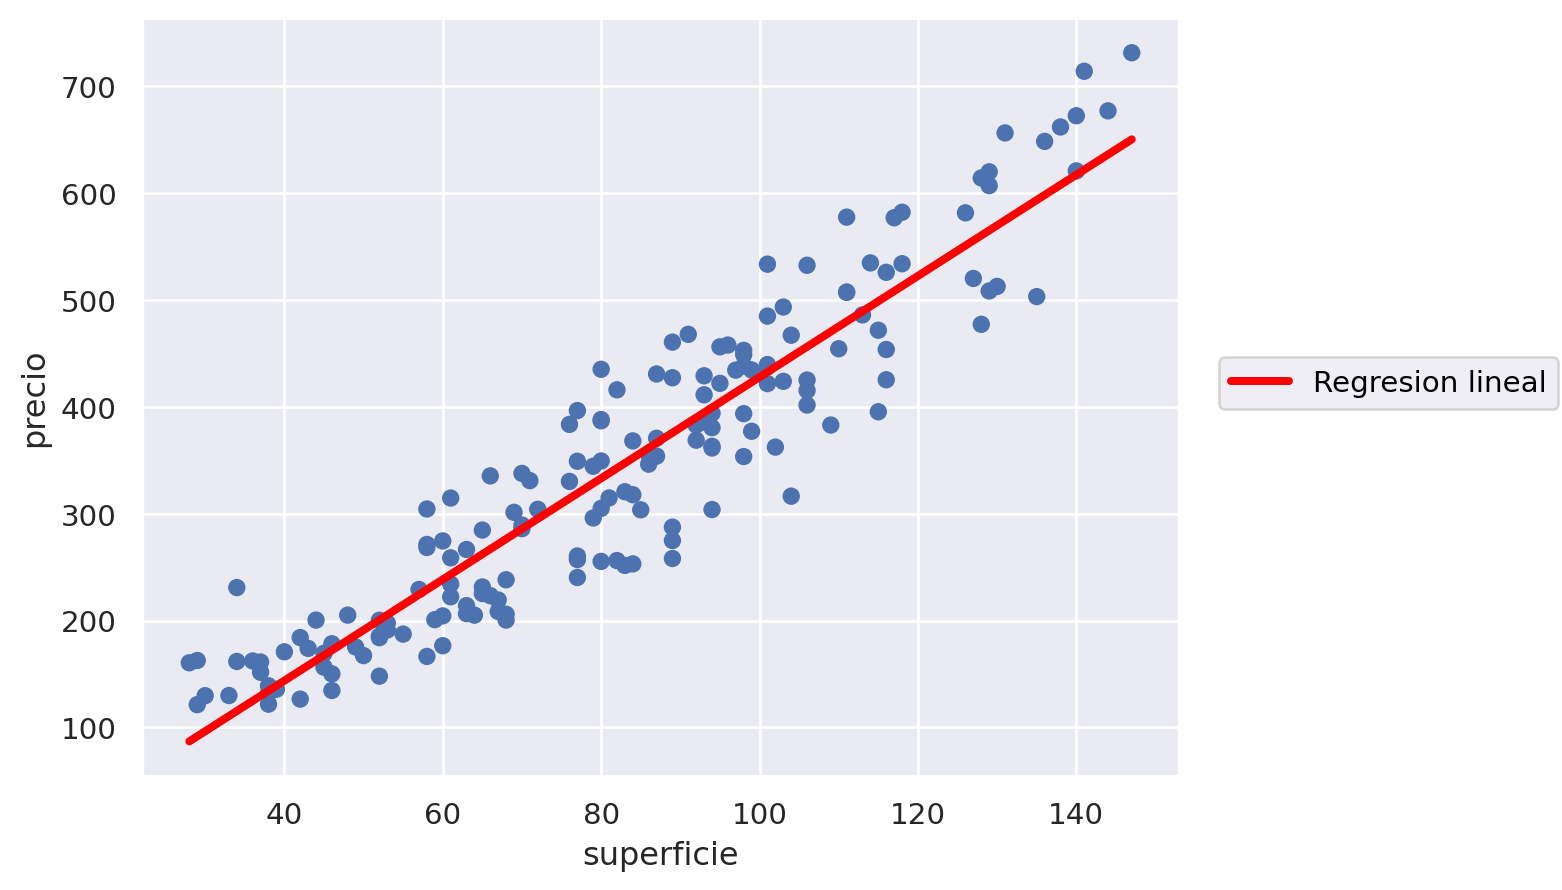

4.73579682230239 -45.73153403092567
This bitch: 



2630.9300019446955

0.8762114698357931

Cucu: 



0.8762114698357936

2630.9300019446955

In [72]:
#2
# a b
datos = pd.read_csv('inmuebles.csv')

display(
    so.Plot(data=datos, x="superficie", y="precio")
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')
)

# c
modelo= linear_model.LinearRegression()
modelo.fit(datos[["superficie"]], datos[["precio"]])
b1= modelo.coef_[0][0]
b0= modelo.intercept_[0]
print(b1,b0)

# d e f

def ecm(x,y,pendiente, ordenada):
  Yprim= (x*pendiente + ordenada)
  return ((y-Yprim)**2).mean()

def r_cuad(x,y,pendiente,ordenada):
  Yprim= (x*pendiente + ordenada)
  Ym= y.mean()
  return ((  ((Yprim - Ym)**2).sum()  )/(  ((y-Ym)**2).sum()  ))

print("This bitch: \n")
display( ecm(datos["superficie"], datos["precio"], b1, b0),
        r_cuad(datos["superficie"], datos["precio"], b1, b0) )


print("Cucu: \n")
y_pred = modelo.predict(datos[['superficie']])
display(r2_score(datos[['precio']], y_pred),
mean_squared_error(datos[['precio']], y_pred))

# O sea por lo que entendi es que ninguna tiene unidades.
# El R2 va de 0 a 1 y cuanto mas grande, mejor
# EL otro solo dictamina la diferencia entre lo predicho y lo real.



<Axes: xlabel='zona', ylabel='precio'>

'Del modelo 1:'

2.442081388302122

58.852000241172306

14012.711665037068

0.5629774807954829

'Del modelo 2:'

3.206278999112207

80.73010925558549

4574.200269202101

0.401665633428065

'Del modelo 3:'

4.560544269538954

24.966485225784936

5827.095750369906

0.9617450093259228

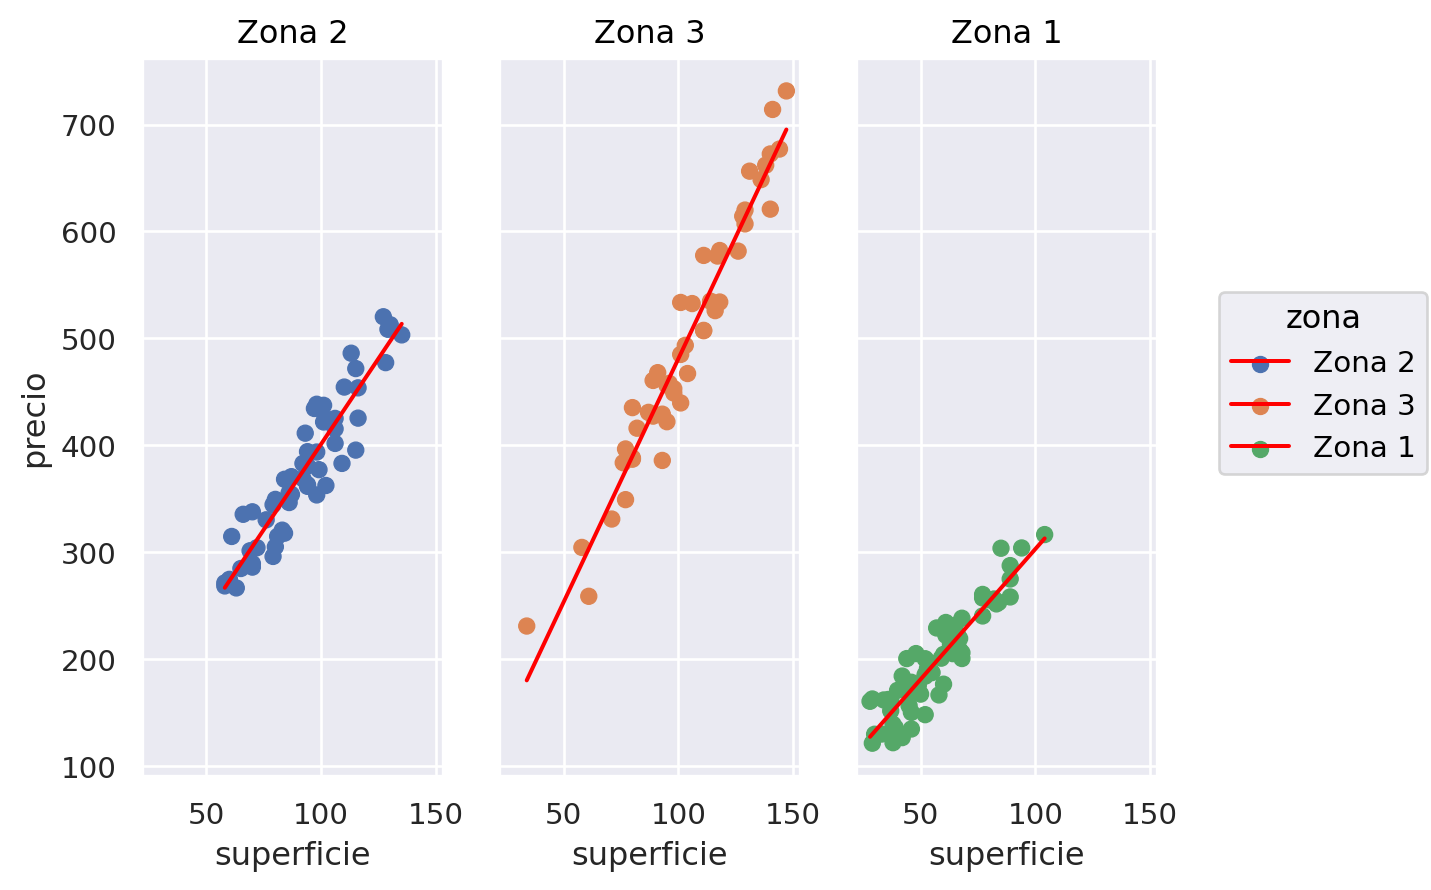

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'Modelo 1'

array([[315.27054601]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'Modelo 2'

array([[417.38940416]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'Modelo 3'

array([[503.82363353]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'Modelo gral'

array([[451.52713231]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Es 101.3580091668062


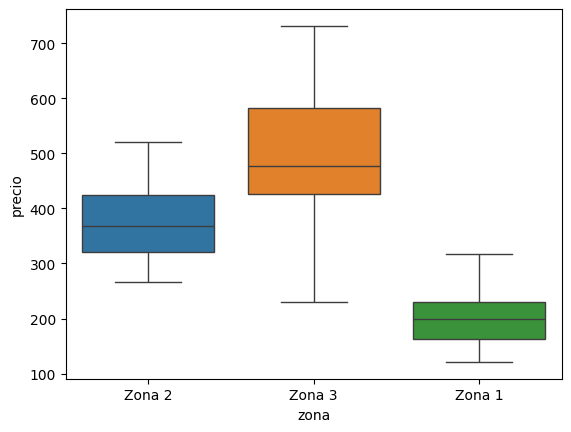

In [115]:
#2

# g

display(sns.boxplot(datos, y="precio", x="zona" ,hue="zona"))
# No hay outlier

# h
dat1= datos[datos["zona"]=="Zona 1"]
dat2= datos[datos["zona"]=="Zona 2"]
dat3= datos[datos["zona"]=="Zona 3"]

mod1= linear_model.LinearRegression()
mod1.fit( dat1[["superficie"]], dat1[["precio"]])
b1= mod1.coef_[0][0]
b0= mod1.intercept_[0]
display("Del modelo 1:",b1, b0, ecm(datos["superficie"], datos["precio"], b1, b0),
        r_cuad(datos["superficie"], datos["precio"], b1, b0))


mod2= linear_model.LinearRegression()
mod2.fit( dat2[["superficie"]], dat2[["precio"]])
b1= mod2.coef_[0][0]
b0= mod2.intercept_[0]
display("Del modelo 2:",b1, b0, ecm(datos["superficie"], datos["precio"], b1, b0),
        r_cuad(datos["superficie"], datos["precio"], b1, b0))

mod3= linear_model.LinearRegression()
mod3.fit( dat3[["superficie"]], dat3[["precio"]])
b1= mod3.coef_[0][0]
b0= mod3.intercept_[0]
display("Del modelo 3:",b1, b0, ecm(datos["superficie"], datos["precio"], b1, b0),
        r_cuad(datos["superficie"], datos["precio"], b1, b0))


# i
display(
    (so.Plot(datos, x="superficie", y="precio", color="zona")
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(1))).facet("zona")
)

# El valor por metro cuadrado seria el b1 de cada modelo.

# j
display("Modelo 1", mod1.predict([[105]]))
display("Modelo 2", mod2.predict([[105]]))
display("Modelo 3", mod3.predict([[105]]))
display("Modelo gral", modelo.predict([[105]]))
# Si obvio cambia por zona!

# k
print("Es",  mod2.predict([[100]])[0][0]-300)


In [ ]:
#2
# l

datos = pd.read_csv('inmuebles_outliers.csv')
dat1= datos[datos["zona"]=="Zona 1"]
dat2= datos[datos["zona"]=="Zona 2"]
dat3= datos[datos["zona"]=="Zona 3"]

mod1= linear_model.LinearRegression()
mod1.fit( dat1[["superficie"]], dat1[["precio"]])
b1= mod1.coef_[0][0]
b0= mod1.intercept_[0]
display("Del modelo 1:",b1, b0, ecm(datos["superficie"], datos["precio"], b1, b0),
        r_cuad(datos["superficie"], datos["precio"], b1, b0))


mod2= linear_model.LinearRegression()
mod2.fit( dat2[["superficie"]], dat2[["precio"]])
b1= mod2.coef_[0][0]
b0= mod2.intercept_[0]
display("Del modelo 2:",b1, b0, ecm(datos["superficie"], datos["precio"], b1, b0),
        r_cuad(datos["superficie"], datos["precio"], b1, b0))

mod3= linear_model.LinearRegression()
mod3.fit( dat3[["superficie"]], dat3[["precio"]])
b1= mod3.coef_[0][0]
b0= mod3.intercept_[0]
display("Del modelo 3:",b1, b0, ecm(datos["superficie"], datos["precio"], b1, b0),
        r_cuad(datos["superficie"], datos["precio"], b1, b0))

# En resumen, mucho cuidado con los outliers, lo que mas joden es el ECM
# Pero tambien afectan bastante a los coefs.



,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


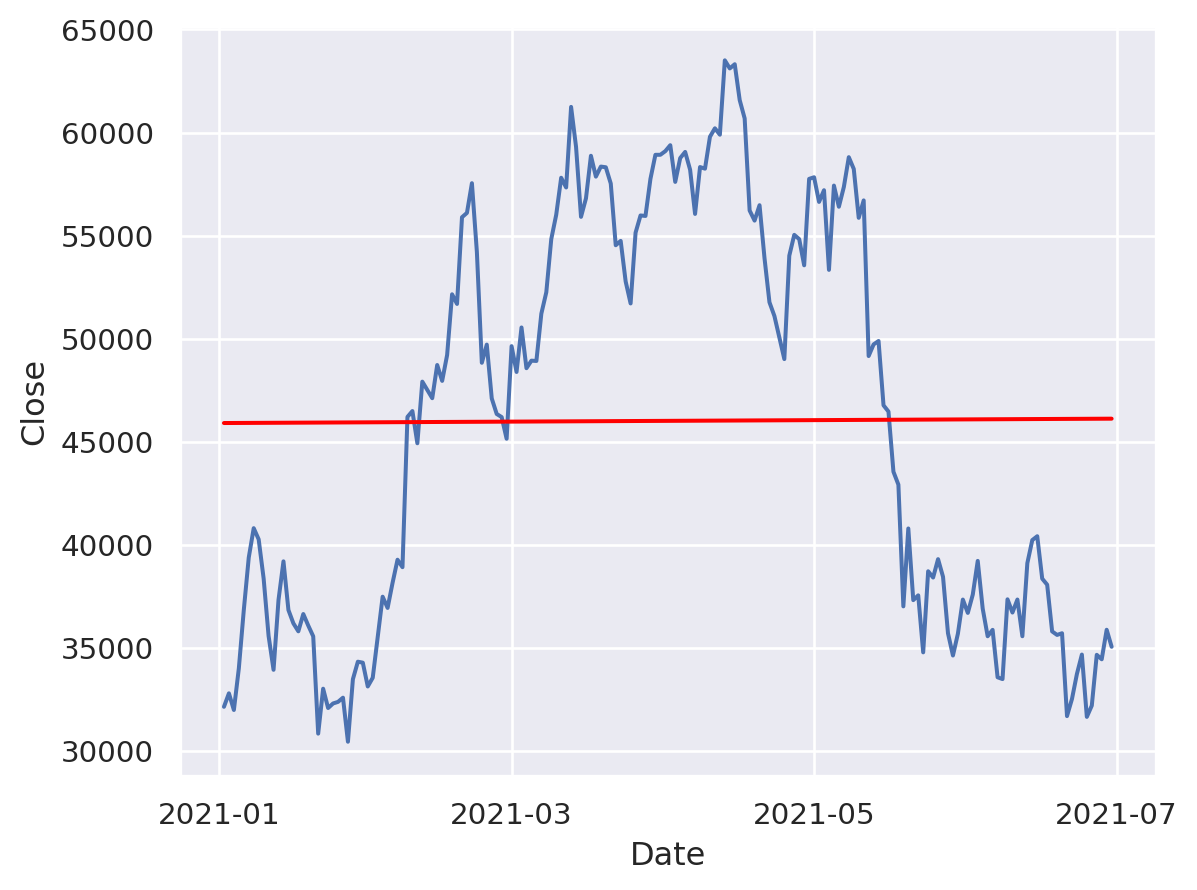

In [132]:
#3
btc = pd.read_csv('bitcoin.csv')

display(btc.head())

# Nos aseguramos que pandas interprete la fecha correctamente
btc['Date'] = pd. to_datetime (btc['Date'], format='%Y-%m-%d')
# Filtramos el dataset en el periodo de interes
btc_2021 = btc [( btc['Date']>"2021 -01 -01") & (btc['Date']<"2021 -07 -01")]

display(
    so.Plot(btc_2021,x="Date" ,y="Close")
    .add(so.Line())
    .add(so.Line(color="red"), so.PolyFit(1))
)

# No es util, es basicamente el valor medio! digo, MIREN SU ERROR!
# no predice nada


19.78594262295082

0.10502451738435337

2.99827868852459

0.10502451738435337

0.9202696135546731

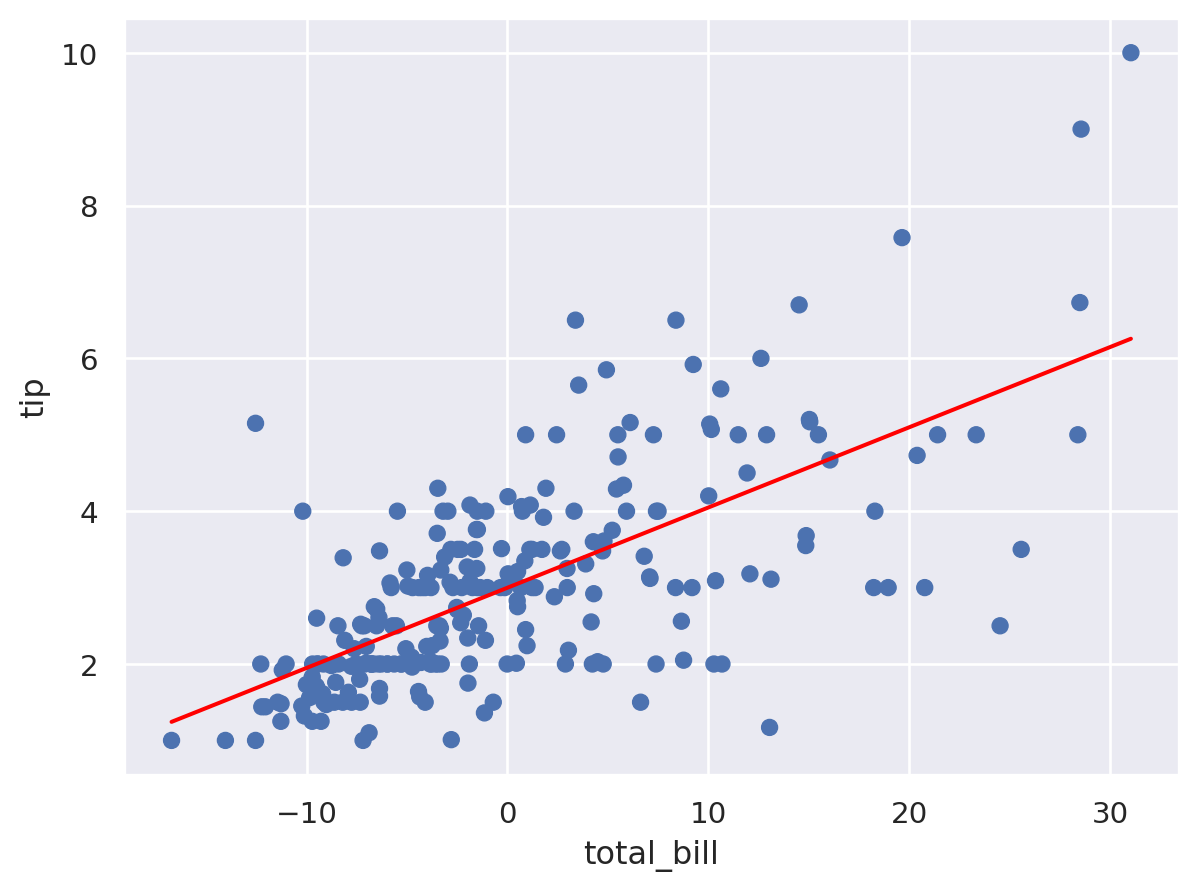

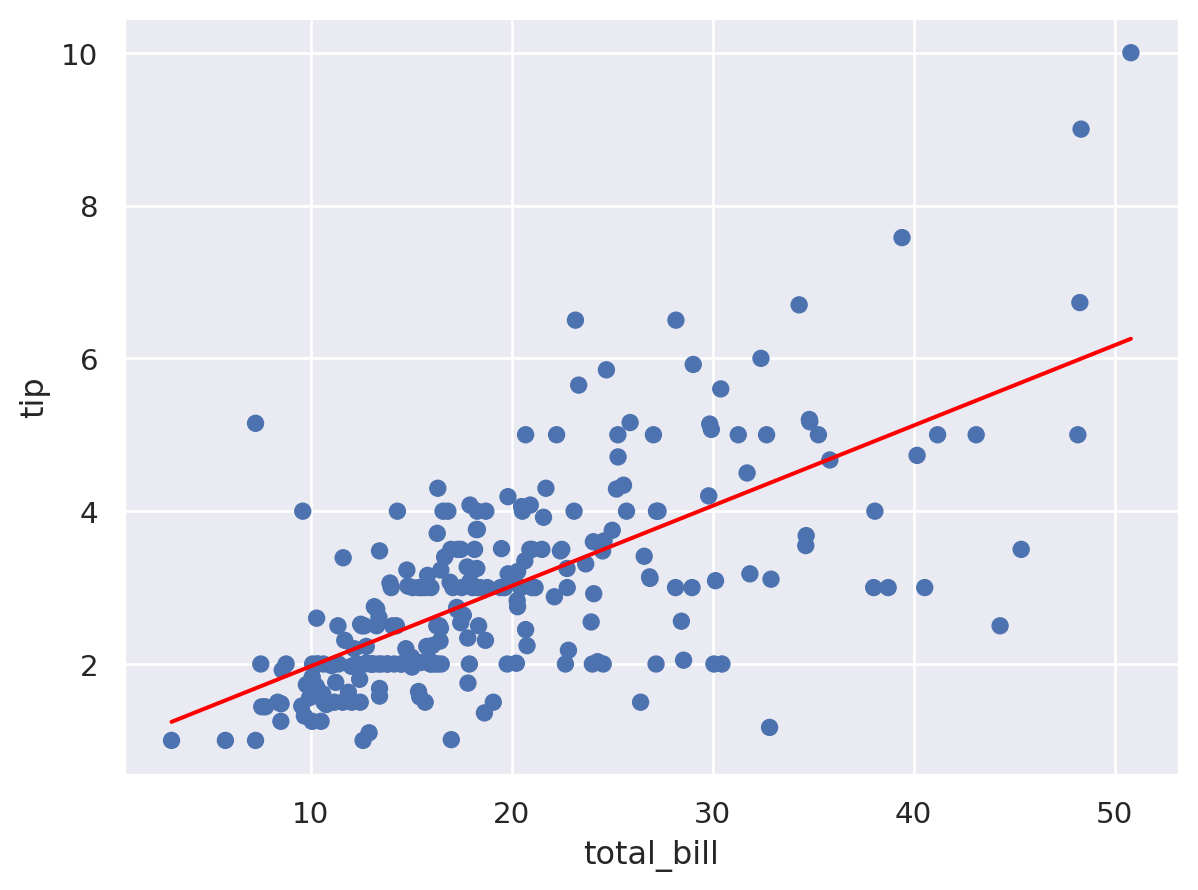

In [160]:
#4
# a
datos = sns. load_dataset ('tips')

# Media de 19.78- aprox
TBM= datos["total_bill"].mean()

display(TBM)

modelo= linear_model.LinearRegression()
modelo.fit(datos[["total_bill"]]-TBM, datos[["tip"]])

b1= modelo.coef_[0][0]
b0= modelo.intercept_[0]

display(b1, b0)

modelo= linear_model.LinearRegression()
modelo.fit(datos[["total_bill"]], datos[["tip"]])

b1= modelo.coef_[0][0]
b0= modelo.intercept_[0]

display(b1, b0)

display(
    so.Plot(x= datos["total_bill"]-TBM, y= datos["tip"])
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(1))
)
display(
    so.Plot(x= datos["total_bill"], y= datos["tip"])
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(1))
)

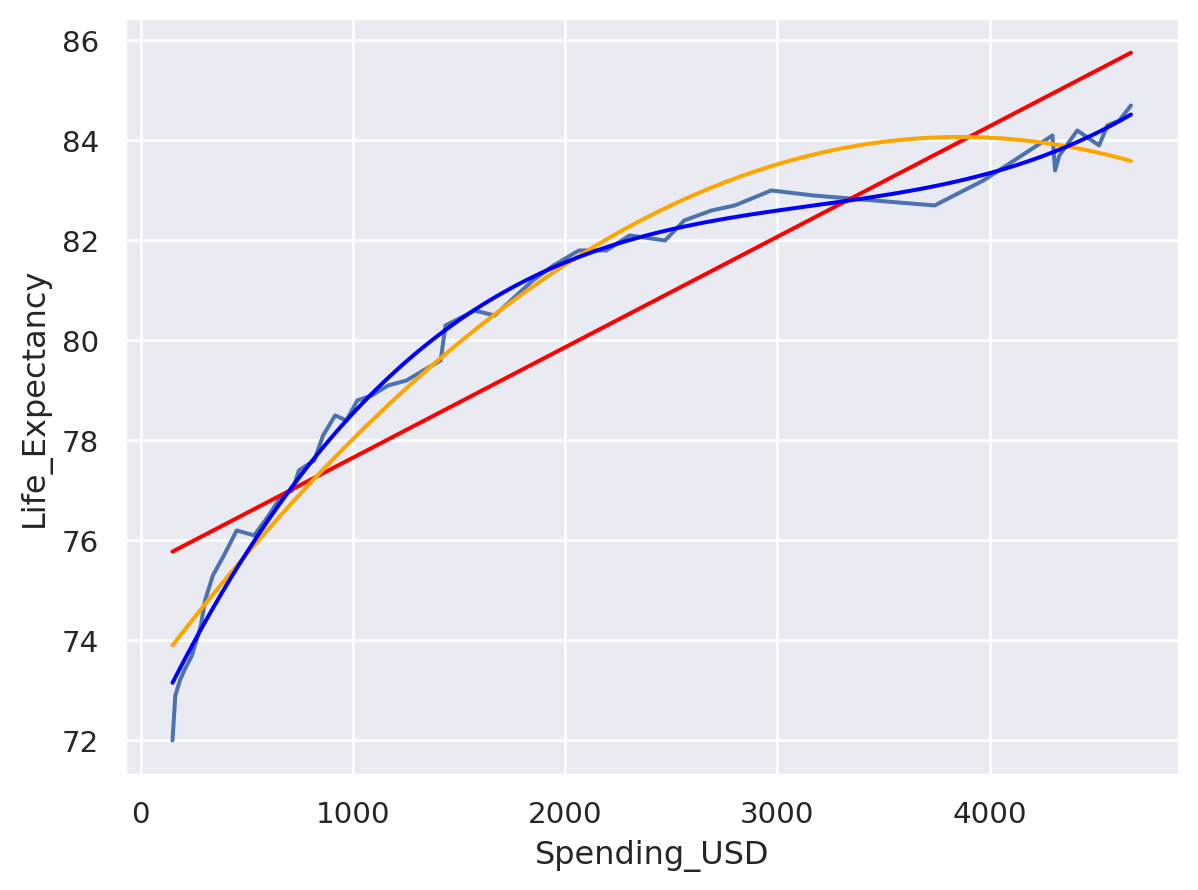

beta_0:  71.84403247811414
beta_1:  0.00909766222027931
beta_2:  -2.684173321376585e-06
beta_3:  2.8216848452775663e-10
R^2:  0.9912790933475436
ECM:  0.10758286138707222
85.49907111106565


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/seaborn/_stats/regression.py:30: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, self.order)


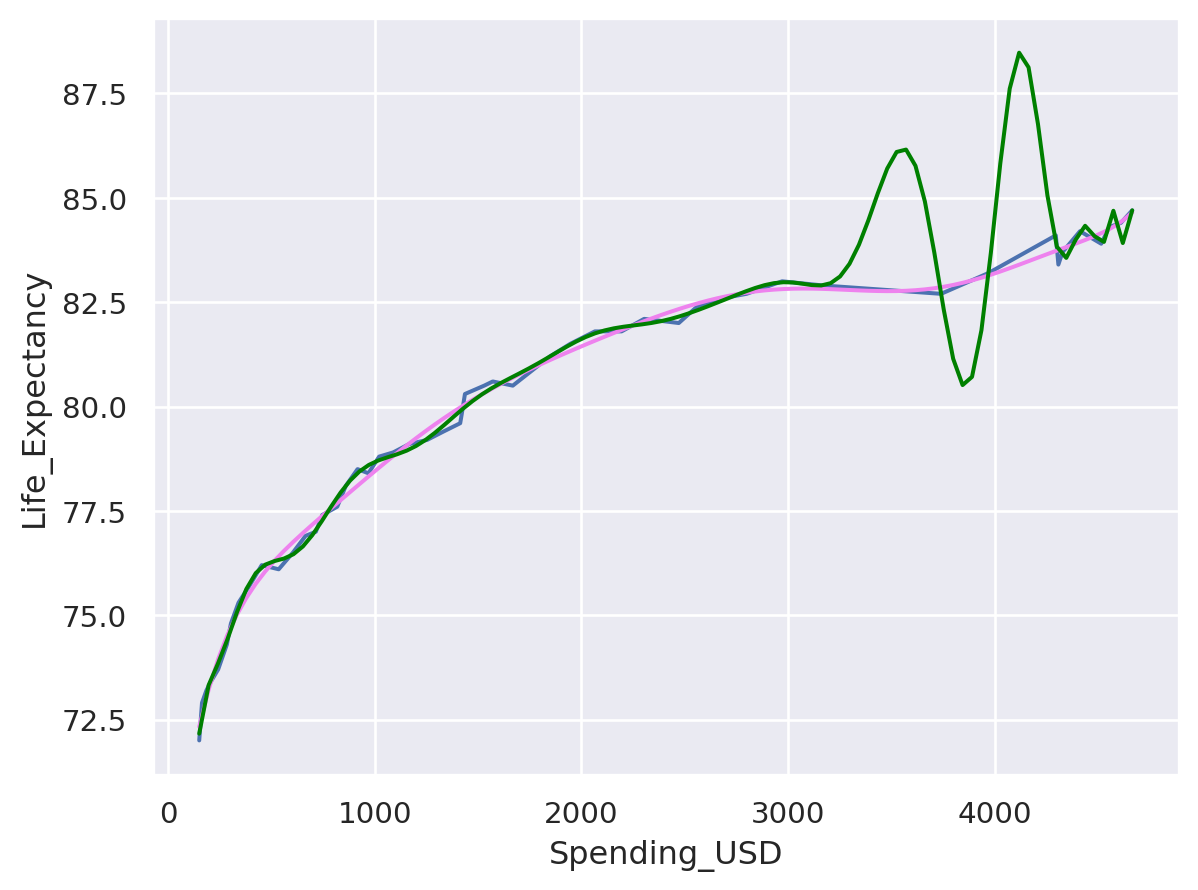

In [174]:
#5
datos = sns. load_dataset ('healthexp')

dataJap= datos[datos['Country']=="Japan"]
display(
    so.Plot(dataJap, x="Spending_USD", y="Life_Expectancy")
    .add(so.Line())
    .add(so.Line(color="red"), so.PolyFit(1))
    .add(so.Line(color="orange"), so.PolyFit(2))
    .add(so.Line(color="blue"), so.PolyFit(3))
)
# B


# Indicamos que queremos un polinomio de Grado 3 sin ordenada al origen
polynomial_features= PolynomialFeatures(degree=3, include_bias=False)

# Armamos una matriz cuya primera columna es x, la segunda es x^2
# y la tercera es x^3
x_poly = polynomial_features.fit_transform(dataJap[['Spending_USD']])
# display(x_poly)


# Inicializamos el modelo de regresión
modelo = linear_model.LinearRegression()

# Realiza el ajuste
modelo.fit(x_poly, dataJap['Life_Expectancy'])

# Recuperamos los valores de los coeficientes (de menor potencia a la mayor)
beta = modelo.coef_

# Recuperamos la ordenada al origen
o_origen = modelo.intercept_.item()

# Imprimimos los valores:
print('beta_0: ', o_origen)
print('beta_1: ', beta[0])
print('beta_2: ', beta[1])
print('beta_3: ', beta[2])

#

# C
y_pred = modelo.predict(x_poly)

# Calculando el R^2
r2 = r2_score(dataJap['Life_Expectancy'], y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(dataJap['Life_Expectancy'], y_pred)
print('ECM: ', ecm)


# D
# O mas rapido, esto genera el array de potencias de 1990 desde 1 a 3 inclusive
pots = 5000 ** np.arange(1, 4)
print(modelo.predict([pots]).item())

display(
    so.Plot(dataJap, x="Spending_USD", y="Life_Expectancy")
    .add(so.Line())
    .add(so.Line(color="violet"), so.PolyFit(10))
    .add(so.Line(color="green"), so.PolyFit(50))
)

# La mejora a mayor grado es casi insignificante.